In [1]:
import os
import sv as SV
import numpy as np
import astropy.table as atable

from desitarget.sv1.sv1_targetmask import bgs_mask as sv1_bgs_mask
from desitarget.sv3.sv3_targetmask import bgs_mask as sv3_bgs_mask

from gama import gama_match

In [2]:
# -- plotting -- 
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

In [4]:
# load compiled zsuccess rates to file
#dat_dir = '/global/cscratch1/sd/chahah/bgs-cmxsv/sv-paper/'
#dat_dir = '/global/cscratch1/sd/mjwilson/desi/BGS/bgs-cmxsv/'
dat_dir = '/Users/chahah/data/bgs_cmxsv/sv_paper/'

sv1_gals = atable.Table.read(os.path.join(dat_dir, 'sv1.bgs_exps.efftime160_200.zsuccess.v4.fits'))
sv3_gals = atable.Table.read(os.path.join(dat_dir, 'sv3.bgs_exps.efftime160_200.zsuccess.v4.fits'))
main_gals = atable.Table.read(os.path.join(dat_dir, 'main.bgs_exps.efftime160_200.zsuccess.v4.fits'))

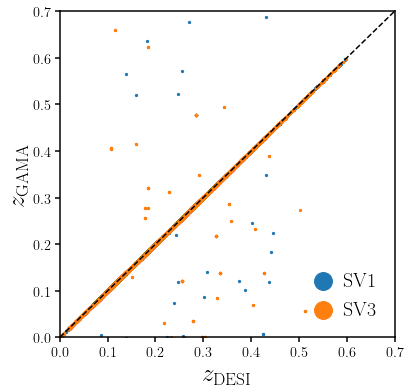

In [11]:
fig = plt.figure(figsize=(6,6))
sub = fig.add_subplot(111)
for cat, label in zip([sv1_gals, sv3_gals], ['SV1', 'SV3']):
    cat  = gama_match(cat)
    
    mask = cat['GAMA_Z'].mask
        
    sub.scatter(cat['Z'].data[~mask & (cat['ZSUCCESS'].data == True)], cat['GAMA_Z'].data[~mask & (cat['ZSUCCESS'].data == True)], s=5, label=label)
sub.plot([0., 1.], [0., 1.], c='k', ls='--')
sub.set_xlim(0.0, 0.7)
sub.set_ylim(0.0, 0.7)

sub.set_xlabel(r'$z_{\rm DESI}$', fontsize=25)
sub.set_ylabel(r'$z_{\rm GAMA}$', fontsize=25)

sub.legend(loc='lower right', handletextpad=0, markerscale=8, fontsize=20)
fig.savefig('figs/gama_zcomp.pdf', bbox_inches='tight')